In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils import pad_sequences
print(pad_sequences)

max_feature = 10000
maxlen = 500

(x_train,y_train), (x_test, y_test) = imdb.load_data(num_words=max_feature)

<function pad_sequences at 0x000001A39A541AF0>


In [2]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32))
model.add(SimpleRNN(units=32))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [7]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 50s 64ms/step - loss: 0.2079 - acc: 0.9200 - val_loss: 0.3784 - val_acc: 0.8575
Epoch 2/5
782/782 [==============================] - 52s 67ms/step - loss: 0.2057 - acc: 0.9213 - val_loss: 0.4595 - val_acc: 0.8080
Epoch 3/5
782/782 [==============================] - 50s 64ms/step - loss: 0.1588 - acc: 0.9397 - val_loss: 0.4576 - val_acc: 0.8406
Epoch 4/5
782/782 [==============================] - 46s 59ms/step - loss: 0.1252 - acc: 0.9546 - val_loss: 0.5284 - val_acc: 0.8174
Epoch 5/5
782/782 [==============================] - 43s 55ms/step - loss: 0.1107 - acc: 0.9600 - val_loss: 0.5794 - val_acc: 0.7994


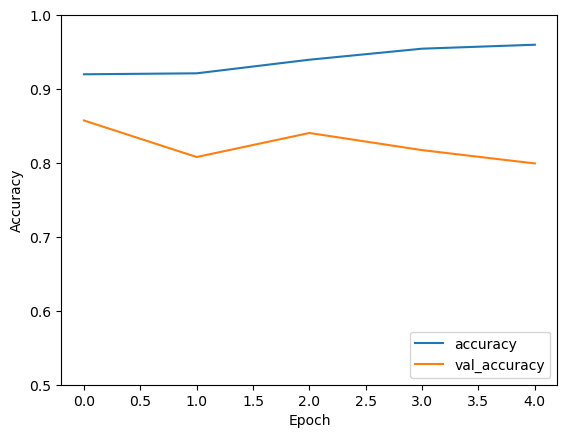

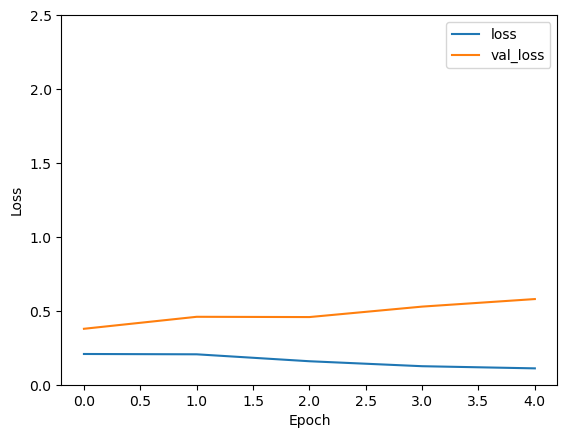

In [11]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 2.5])
plt.legend(loc='upper right')
plt.show()